In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"animesh27k","key":"491a4398a5a49f010120287859a61f63"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets list

ref                                                             title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/most-streamed-spotify-songs-2024               Most Streamed Spotify Songs 2024                   496KB  2024-06-15 18:50:51           3234         81  1.0              
rabieelkharoua/students-performance-dataset                     📚 Students Performance Dataset 📚                    66KB  2024-06-12 23:09:20           4012         76  1.0              
shreyanshverma27/online-sales-dataset-popular-marketplace-data  Online Sales Dataset - Popular Marketplace Data      7KB  2024-05-25 23:55:26          11401        203  1.0              
teocalvo/teomewhy-loyalty-system                                T

In [8]:
! kaggle datasets download -d rupakroy/online-payments-fraud-detection-dataset

Dataset URL: https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset
License(s): CC-BY-NC-SA-4.0
 95% 169M/178M [00:01<00:00, 104MB/s] 
100% 178M/178M [00:01<00:00, 97.4MB/s]


In [9]:
! unzip online-payments-fraud-detection-dataset.zip

Archive:  online-payments-fraud-detection-dataset.zip
  inflating: PS_20174392719_1491204439457_log.csv  


In [10]:
import pandas as pd

In [11]:
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')

#EDA
Converting String data to Numerical data



In [12]:
# Get one hot encoding of columns type
one_hot = pd.get_dummies(df['type'])
# Drop column type as it is now encoded
df = df.drop('type',axis = 1)
# Join the encoded df
df = df.join(one_hot)

In [13]:
df = df.drop(['nameOrig'],axis=1)

In [14]:
df['nameDest_type'] = df['nameDest'].str[0]

In [15]:
df = df.drop(['nameDest'],axis=1)

In [16]:
# Get one hot encoding of columns type
one_hot = pd.get_dummies(df['nameDest_type'])
# Drop column type as it is now encoded
df = df.drop('nameDest_type',axis = 1)
# Join the encoded df
df = df.join(one_hot)

In [17]:
df = df.drop('M', axis=1)

Normalize features

In [19]:
def norm_column(df, columns):
    for col in columns:
        df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())


In [21]:
norm_cols = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
for col in norm_cols:
    norm_column(df, [col])

In [22]:
df_isFraud = df[df['isFraud'] == 1]
df_isnotFraud = df[df['isFraud'] == 0]

In [25]:
df_isnotFraud = df_isnotFraud.sample(n=8213)

In [26]:
df = pd.concat([df_isFraud, df_isnotFraud])

In [30]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [37]:
# Split the data into features (X) and target (y)
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [38]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
y_pred = rf.predict(X_test)

In [40]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9945222154595252


In [43]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x788130c7c910>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78813045de40>})

In [45]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

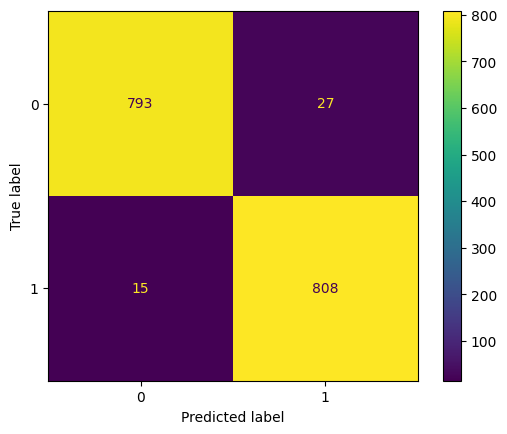

In [47]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

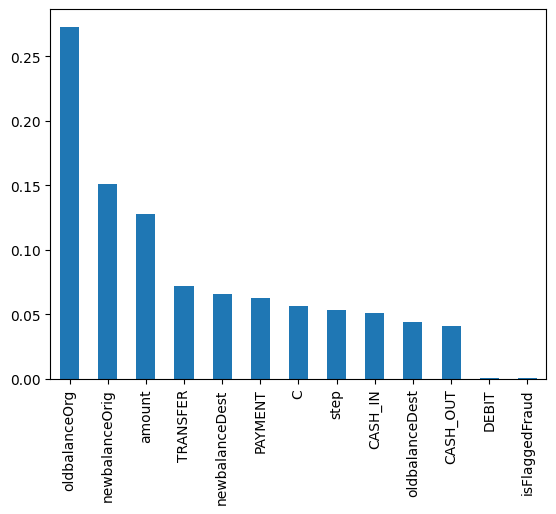

In [48]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();